In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

# Review

## Decision Trees, Graphically

Let's load in our penguin data set, and plot the bill length and bill depth for our three species

In [2]:
pengwing = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/penguins.csv")
pengwing.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


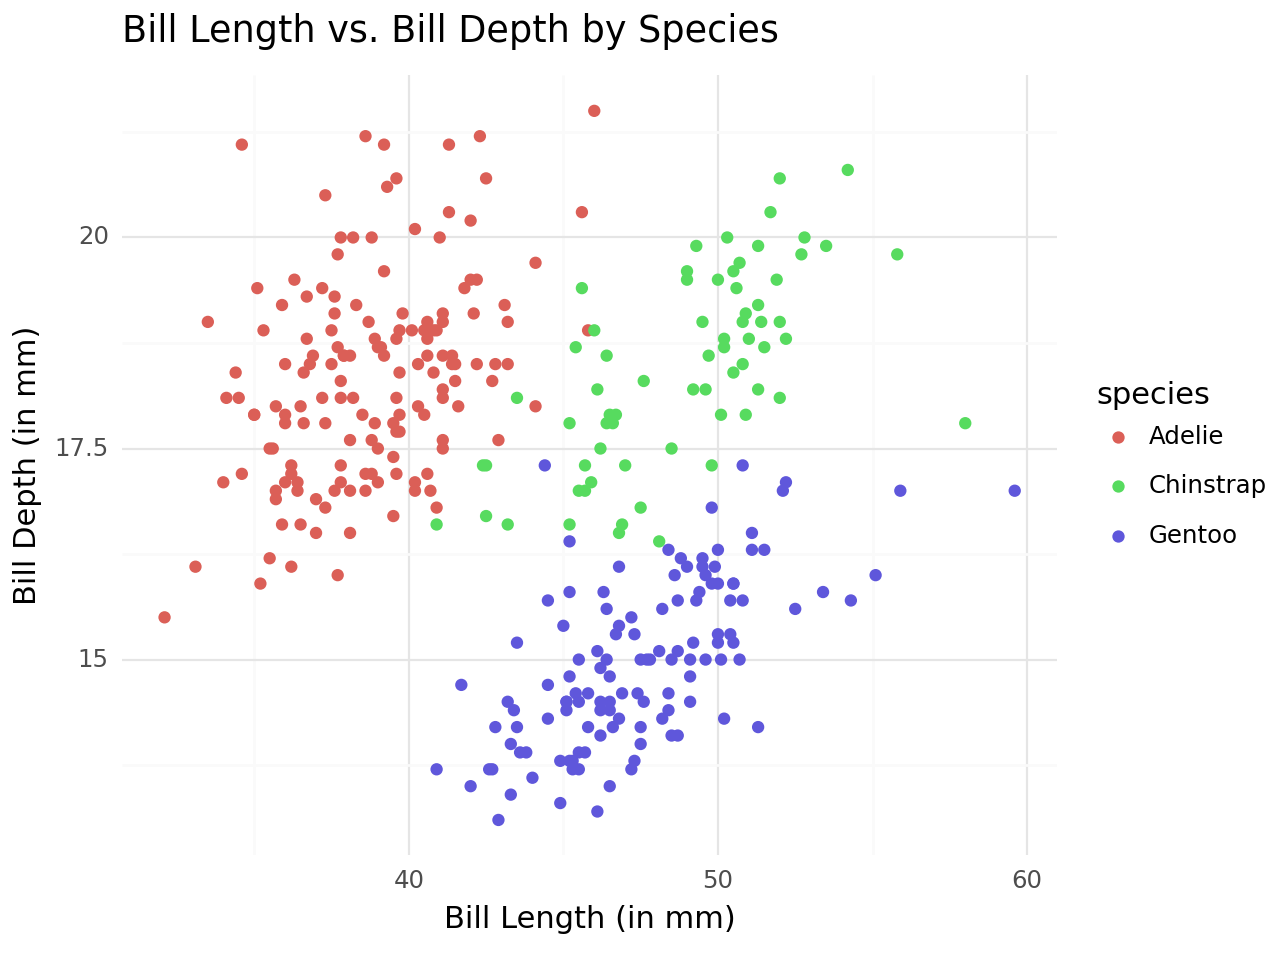

<Figure Size: (640 x 480)>

In [3]:
(ggplot(pengwing, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + geom_point()
 + theme_minimal()
 + labs(x = "Bill Length (in mm)", y = "Bill Depth (in mm)", title = "Bill Length vs. Bill Depth by Species"))

We could use a decision tree based on bill length and bill depth to classify penguins as different species. First, we could split on Bill Depth and decide that any penguin with a depth less than 16.5 mm, should be classified as a Gentoo penguin.

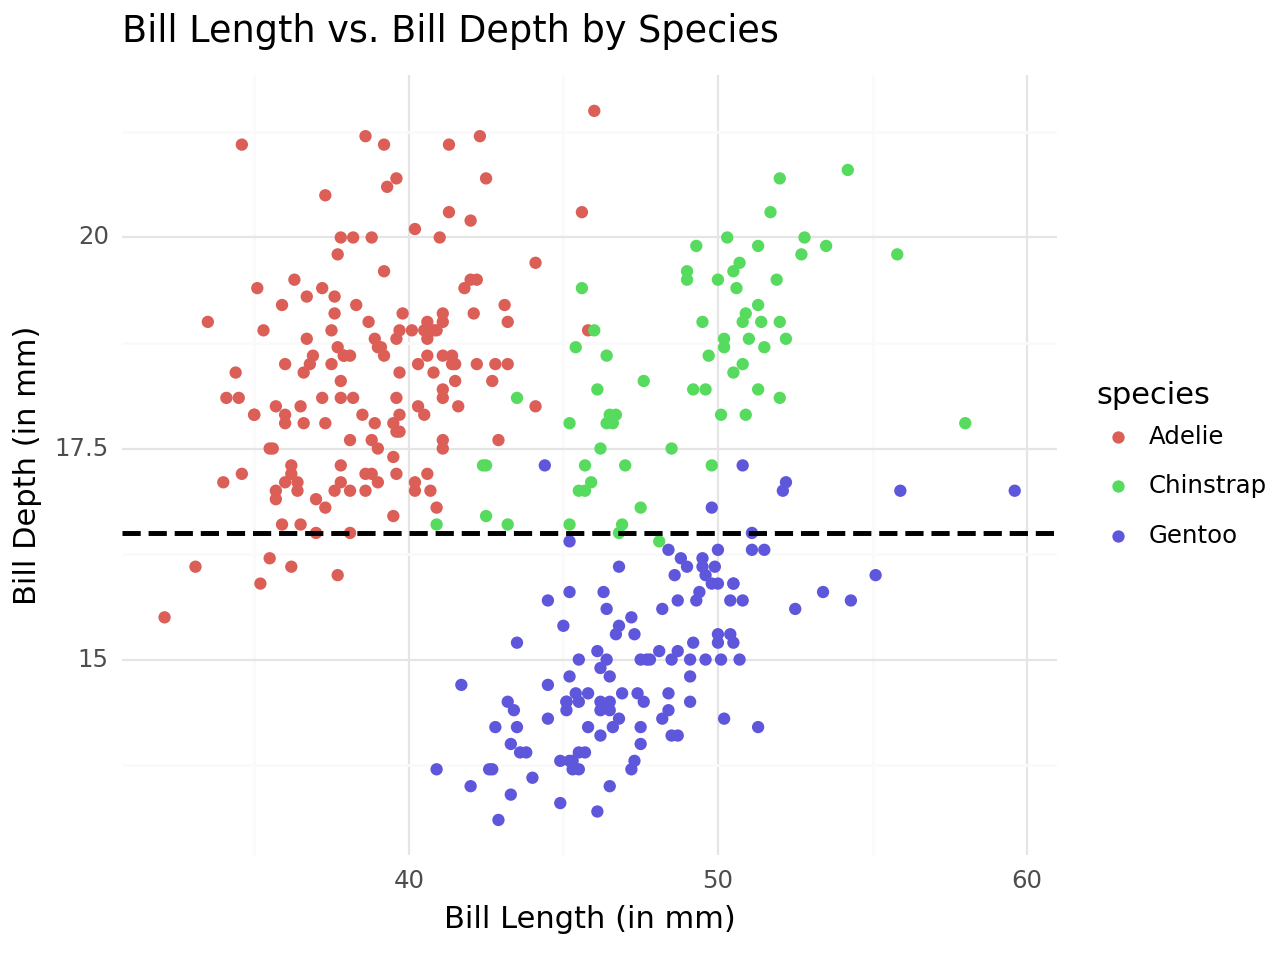

<Figure Size: (640 x 480)>

In [5]:
split1 =16.5 # Your split value here

(ggplot(pengwing, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + geom_point()
 + theme_minimal()
 + labs(x = "Bill Length (in mm)", y = "Bill Depth (in mm)", title = "Bill Length vs. Bill Depth by Species")
 + geom_hline(yintercept = split1, size = 1, linetype = "dashed"))

That bottom group looks GREAT. Now let's look at the top group. Most of the Chinstrap penguins have longer bill lengths. Let's say that if a penguin has a bill depth > 16.5mm, then we will split on bill length at 41.5 to separate the Adelie and Chinstrap penguins.

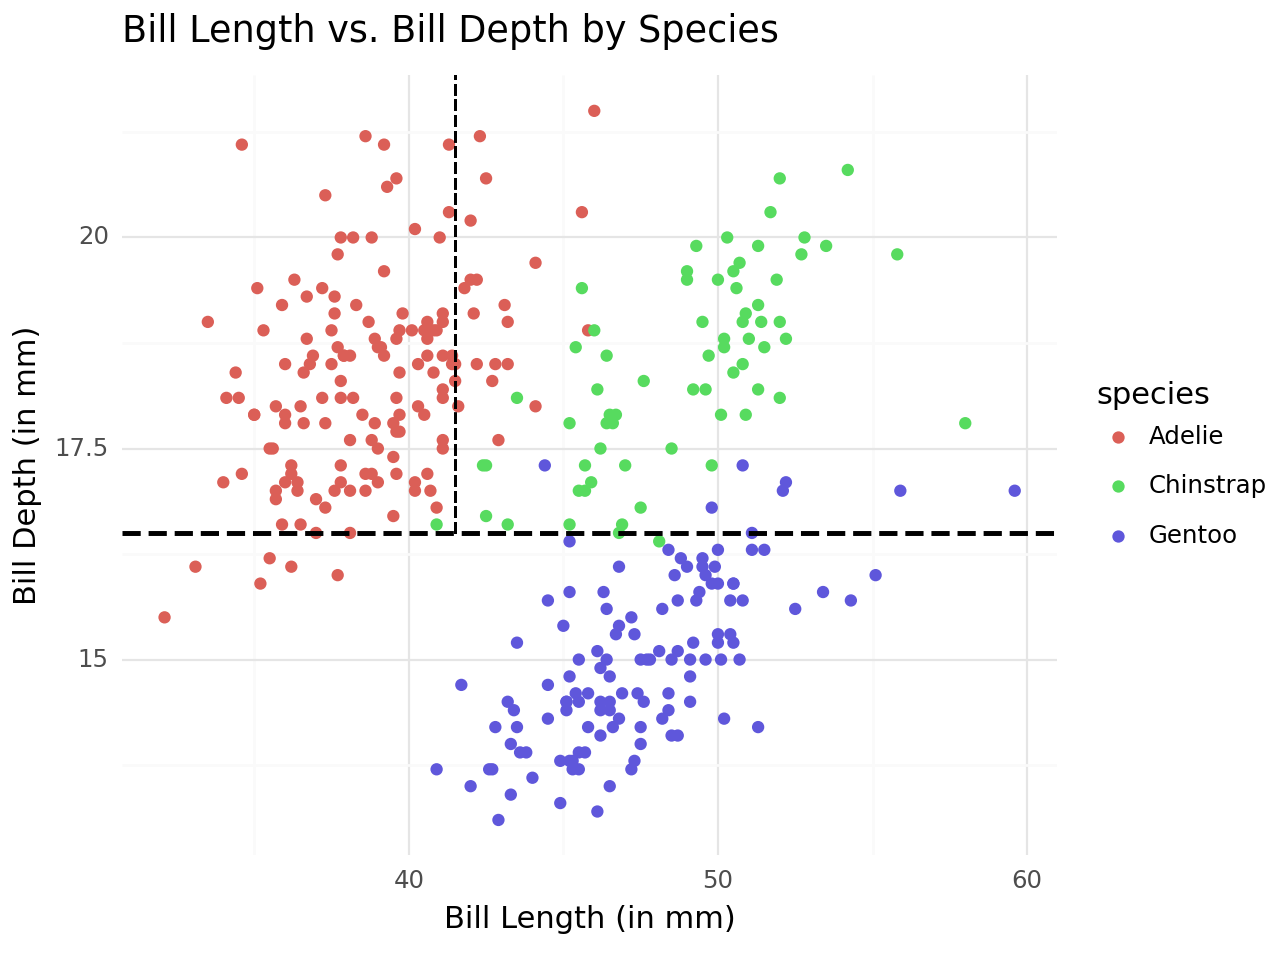

<Figure Size: (640 x 480)>

In [6]:
split2 =41.5 ## Your split value here

(ggplot(pengwing, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + geom_point()
 + theme_minimal()
 + labs(x = "Bill Length (in mm)", y = "Bill Depth (in mm)", title = "Bill Length vs. Bill Depth by Species")
 + geom_hline(yintercept = split1, size = 1, linetype = "dashed")
 + geom_segment(x = split2, xend = split2, y = split1, yend = 22, size = 0.6, linetype = "dashed", color = "black"))

We've built a (very short) decision tree! It would look like this.

<img src="https://drive.google.com/uc?export=view&id=1wMi2k4RI9RuYq-NcHRVm7b62p4UwUXSh" width = "400"/>



## Entropy

<img src="https://drive.google.com/uc?export=view&id=1XIXhz6AsrwjIjU2yeS9pSsHXU8bkJJms" alt="Entropy Low" style="width: 400px;"/>
<img src="https://drive.google.com/uc?export=view&id=1WewfI95gICSwbTU9DiQ1lSv2-grHIvBJ" alt="Entropy Hight" style="width: 400px;"/>



Entropy is a measure of disorder/chaos. We want ordered and organized data in the leaf nodes of our decision trees. So we want LOW entropy. **Entropy** is defined as:

$$ E = -\sum_1^N p_i* log_2(p_i) $$

Where $N$ is the number of categories or labels in our outcome variable.

This is compared to **gini impurity** which is:

$$GI = 1 - \sum_1^N p_i^2$$

Gini impurity is probability of misclassifying a random data point from that node.


(if you're super into decision trees, check out this paper [Theoretical comparison between the Gini Index and
Information Gain criteria](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf))

<img src="https://drive.google.com/uc?export=view&id=1z75AaS4i_39n-sZrrkgYKHrm_e8p6GJR" />

### *Question*

WHY do we want the leaf nodes of our tree to be ordered (have low entropy or impurity?)?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


## Measures of Chaos for a Split

When you split a node, we now have two new nodes. In order to calculate the chaos (entropy or gini impurity) of the split, we have to calculate the chaos (entropy or gini impurity) for EACH of the new nodes and then calculate the weighted average chaos (entropy or gini impurity).  

The reason we weight each node differently in this calculation, is because if a node has more data in it, than it has more impact, and therefore its measure of chaos (entropy or gini impurity) should count more.

In general, once you've calculated the chaos (entropy or gini impurity) for each of the new nodes, you'll use this formula to calculate the weighted average:


$$ WC = (\frac{N_L}{Total}* C_L) + (\frac{N_R}{Total}* C_R)$$

Where $N_L$ is the number of data points in the Left Node, $N_R$ is the number of data points in the Right Node, and $Total$ is the total number of data points in that split. $C_R$ and $C_L$ are the chaos measure (entropy of gini impurity) for the right and left nodes, respectively.



## `sklearn`

### Decision Trees

Let's first build a Decision Tree to **classify** patients as diabetic or not diabetic.

In [7]:
# models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Decision Tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # random forest
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor # gradient boosting
from sklearn.linear_model import LinearRegression

# preprocessing 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer

# model validation
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

# performance
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# pipeline imports
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

In [8]:
d = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/diabetes2.csv")
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:

predictors = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
              "Insulin","BMI","DiabetesPedigreeFunction","Age"]
X = d[predictors]
y = d["Outcome"]

# z scoring not important, because none of the variables are influencing/compared to each other directly
# scale doesn't matter here. But z scoring wont hurt.


# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# Create Empty Model
pre = make_column_transformer((StandardScaler(), predictors),
                              remainder = "passthrough")
tree = DecisionTreeClassifier(random_state = 1234)

pipe = Pipeline([
    ("preprocessing", pre),
    ("tree", tree)
])

# Fit
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('tree', DecisionTreeClassifier(random_state=1234))])

In [10]:
print(ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test)))
print(ConfusionMatrixDisplay.from_predictions(y_train, pipe.predict(X_train)))

In [11]:
# new model
pipe.named_steps["tree"].get_depth()

13

### Limiting Max_Depth
We talked about different ways to "prune" or limit the depth of a tree, both directly and indirectly via `max_depth` and `min_samples_leaf`.
Let's look at a simulation example to see the effect of limiting the `max_depth` of decision trees.

In [14]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
def simTree(n = 200, max_depth = "none"):

    n2 = int(n/2)

    #---generate data-----------------------------------
    # generate predictors, only x1 and x2 are related to the outcome
    x1 = np.concatenate([np.random.normal(0,1,n2),
                         np.random.normal(2,1,n2)])
    x2 = np.random.normal(0,1,n)
    x3 = np.concatenate([np.random.binomial(1,0.2,n2),
                        np.random.binomial(1,0.9, n2)])

    # generate outcome
    outcome = np.repeat(["A","B"], n2)

    # data frame
    df = pd.DataFrame({"x1": x1, "x2" : x2, "x3": x3, "out": outcome})

    #---set X and y------------------------------------
    X = df[["x1","x2","x3"]]
    y = df[["out"]]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


    #---build models------------------------------------

    # if there is no max depth, build regular tree
    if max_depth == "none":
        tree = DecisionTreeClassifier()

    # otherwise, set max_depth
    else:
        tree = DecisionTreeClassifier(max_depth = max_depth)

    tree.fit(X_train,y_train)


    #---get training and test Accuracy---------------------
    train_acc = accuracy_score(y_train,tree.predict(X_train))
    test_acc = accuracy_score(y_test,tree.predict(X_test))

    return(pd.DataFrame({"Set": ["Train", "Test",],
                        "Depth": [str(max_depth), str(max_depth)],
                        "Acc": [train_acc,
                               test_acc]}))

sims = [simTree(n = 2000, max_depth = x) for x in np.repeat(range(2,10), 100)]
sims = sims + [simTree(n = 2000, max_depth = "none") for i in range(0,100)]
sims_df = pd.concat(sims)

sims_df.head()

,Set,Depth,Acc
0,Train,2,0.873750
1,Test,2,0.875000
0,Train,2,0.865625
1,Test,2,0.920000
0,Train,2,0.910000


Now that we've run our simulation, use the sims_df data frame to make a plot that shows us the difference between the train and test accuracy for our full (not limited) and pruned (has a max_depth) trees.

Use geom_boxplot() to plot Acc for each Tree Depth. Fill by Set.

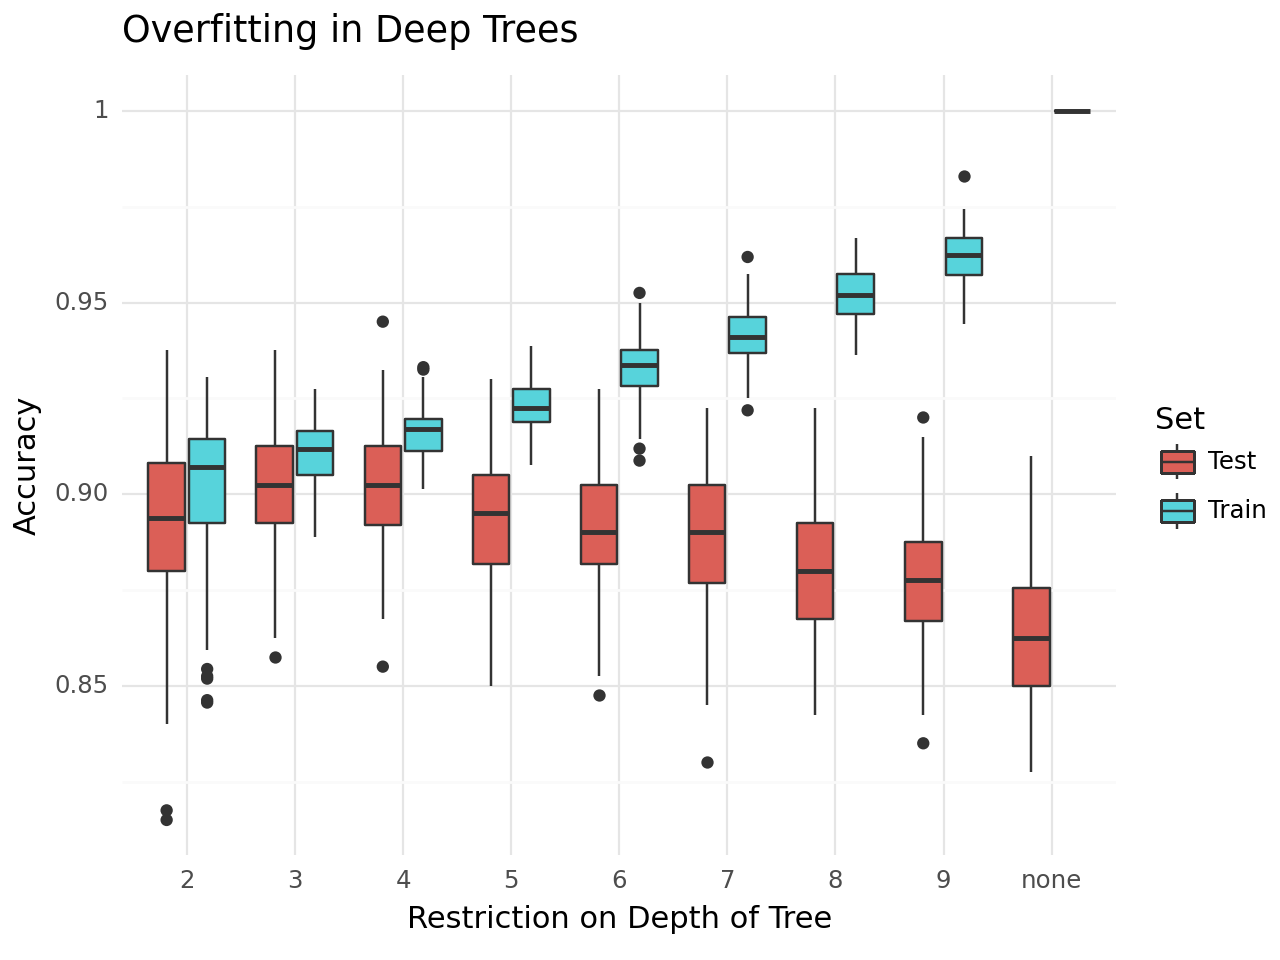

<Figure Size: (640 x 480)>

In [16]:
(ggplot(sims_df, aes(x = "Depth", y = "Acc", fill = "Set")) +
geom_boxplot() + theme_minimal() +
labs(x = "Restriction on Depth of Tree",
    y = "Accuracy",
    title = "Overfitting in Deep Trees"))

#### Question

What does this graph tell you about the effect of limiting the depth of trees?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Random Forests and Gradient Boosting Trees

Now let's copy and paste the code from above and build a **Random Forest** to predict diabetes instead of a single tree, and then using a **Gradient Boosting Tree**.

In [19]:

predictors = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
              "Insulin","BMI","DiabetesPedigreeFunction","Age"]
X = d[predictors]
y = d["Outcome"]

# z scoring not important, because none of the variables are influencing/compared to each other directly
# scale doesn't matter here. But z scoring wont hurt.


# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# create empty model
pre = make_column_transformer((StandardScaler(), predictors),
                              remainder = "passthrough")
tree = DecisionTreeClassifier(random_state = 1234)

pipe = Pipeline([
    ("preprocessing", pre),
    ("tree", tree)
])

# fit
pipe.fit(X_train, y_train)

# predict/assess
print(ConfusionMatrixDisplay.from_predictions(y_train, pipe.predict(X_train)))
print(ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test)))




### Using Trees for Regression
Lastly, let's take a quick look at what we'd need to change if we wanted to predict a *continuous* value instead of a categorical one. Let's look at this data set that measures risk propensity. We're going to predict BART Scores (a score where higher values mean you're riskier), based on a bunch of different measures. We're going to change it from a  `LinearRegression()` model to a `DecisionTreeRegressor()`, `RandomForestRegressor()`, and `GradientBosstingRegressor()`.

In [20]:
bart = pd.read_csv("https://raw.githubusercontent.com/ywen2021/CPSC392/main/Data/bis-bas-bart-syn-clean.csv")

# drop missing
bart.dropna(inplace = True)
bart.reset_index(inplace = True)

# X and y
predictors = [c for c in bart.columns if c != "BART"]
contin = [c for c in predictors if c != "Female"]

X = bart[predictors]
y = bart["BART"]

# model
z = make_column_transformer((StandardScaler(), contin),
                            remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

# model validation
kf = KFold(5)

mse = {"train": [], "test": []}
mae = {"train": [], "test": []}
mape = {"train": [], "test": []}
r2 = {"train": [], "test": []}

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]

    # fit
    pipe.fit(X_train,y_train)

    # predict
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # assess
    mse["train"].append(mean_squared_error(y_train,y_pred_train))
    mse["test"].append(mean_squared_error(y_test,y_pred_test))
    
    mae["train"].append(mean_absolute_error(y_train,y_pred_train))
    mae["test"].append(mean_absolute_error(y_test,y_pred_test))

    mape["train"].append(mean_absolute_percentage_error(y_train,y_pred_train))
    mape["test"].append(mean_absolute_percentage_error(y_test,y_pred_test))

    r2["train"].append(r2_score(y_train,y_pred_train))
    r2["test"].append(r2_score(y_test,y_pred_test))

print("Train MSEs:", mse["train"])
print("Test MSEs :", mse["test"])
print("Train MSE :", np.mean(mse["train"]))
print("Test MSE  :", np.mean(mse["test"]))

print("Train MAEs:", mae["train"])
print("Test MAEs :", mae["test"])
print("Train MAE :", np.mean(mae["train"]))
print("Test MAE  :", np.mean(mae["test"]))

print("Train MAPEs:", mape["train"])
print("Test MAPEs :", mape["test"])
print("Train MAPE :", np.mean(mape["train"]))
print("Test MAPE  :", np.mean(mape["test"]))

print("Train R2s:", r2["train"])
print("Test R2s :", r2["test"])
print("Train R2 :", np.mean(r2["train"]))
print("Test R2  :", np.mean(r2["test"]))



Train MSEs: [145.93651722105184, 142.48796285982044, 140.51325619296193, 144.40330408041692, 140.0981168068198]
Test MSEs : [133.3976045088573, 146.53829976941438, 154.499148658406, 139.7296199743544, 156.12355180229585]
Train MSE : 142.68783143221418
Test MSE  : 146.0576449426656
Train MAEs: [10.674637323316684, 10.466649234978094, 10.352760898571537, 10.553602583404016, 10.298972364613958]
Test MAEs : [10.005449109924223, 10.485291324542843, 10.847447491804708, 10.49856806876055, 11.109985888307044]
Train MAE : 10.469324480976859
Test MAE  : 10.589348376667873
Train MAPEs: [0.8915441779450712, 0.8746255379828396, 0.8933940570011268, 0.862136421361214, 0.8560565751036264]
Test MAPEs : [0.8708200061962684, 0.8824044237149958, 0.7106093507338619, 1.0552412127096522, 0.9230028558533472]
Train MAPE : 0.8755513538787756
Test MAPE  : 0.8884155698416251
Train R2s: [0.05713992144949276, 0.0639962348339419, 0.07008851757062717, 0.058728792369517, 0.07354490730823704]
Test R2s : [0.071444174711

# Classwork
## Gini Impurity

Use python and numpy to write two functions, as described in the comments below.

- LNP: Left Node Positive (cases)
- LNN: Left Node Negative (cases)
- RNP: Right Node Positive (cases)
- RNN: Right Node Negative (cases)


<img src = "https://drive.google.com/uc?id=1MQEeJDxxcV8zmhzBgaDZ2QY0Ng8z8hz8" width = 300px/>

In [ ]:
### YOUR CODE HERE ############


def gini():
    # this function calculates the gini impurity for ONE node (left, right, or root!)
    # this function should take in the POSITIVE cases and NEGATIVE cases as arguments
    # and calculate the gini impurity for that node based on the formula above
    # return the impurity for the node.
    
    pass

def gini_split():
    
    # this function takes FOUR arguments: LNP, LNN, RNP, and RNN and calculates
    # the gini impurity for each node (by calling gini()) and then calculates
    # the WEIGHTED average of the impurity in each node.
    # return the impurity for the split.
    
    pass

### YOUR CODE HERE ###############

In [ ]:
# use this to test your code, if it prints True, you got the right answer

abs(gini_split(10,5,2,12) - 0.3481116584564861) <= 0.0001

## Entropy

Use python and numpy to write two functions, as described by the comments below. If you want to read more about entropy, see this [article](https://bricaud.github.io/personal-blog/entropy-in-decision-trees/).

hint: `np.log2()`

In [ ]:
### YOUR CODE HERE ###############

def entropy():
    # this function calculates the entropy for ONE node (left, right, or root!)
    # this function should take in the POSITIVE cases and NEGATIVE cases counts as arguments
    # and calculate the entropy for that node based on the formula above
    pass

def entropy_split():
    # this function takes FOUR arguments: LNP, LNN, RNP, and RNN and calculates
    # the entropy for each node (by calling entropy()) and then calculates
    # the WEIGHTED average of the entropy in each node.
    # return the entropy for the split.
    pass

### YOUR CODE HERE ###############

In [ ]:
# use this to test your code, if it prints True, you got the right answer

abs(entropy_split(10,5,2,12) - 0.7606157383093077) <= 0.0001

## Build a Categorical Decision Tree

This dataset from UCI is about edible (`e`) and poisonous (`p`) mushrooms.

- `gill-size`: `b` is for broad gills, `n` is for narrow gills.
- `bruises`: `t` is for true, there are bruises, `f` for false, there are no bruises.
- `poison`: `e` for edible, `p` for poison.

In [13]:
# Load Mushroom Data

# see this site for what variables mean: http://archive.ics.uci.edu/ml/datasets/Mushroom
mush = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")

mush.columns = ['poison','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
                'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type',
                'spore-print-color', 'population', 'habitat']

mush.head()

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


For your sanity, let's restrict our dataset to 3 predictor variables...

In [ ]:
mush_small = mush[["poison", "bruises", "gill-size"]]

### Build!

Use the functions you built earlier to build a (very small) decision tree that classifies each data point as either edible (`e`) or poisonous (`p`). You can choose to either use entropy or gini impurity. 

#### Layer 1

Choose which variable to use to split the **first layer**. You have three options: leave the root node alone, split on gill-size, or split on bruises.



In [ ]:
# no split
poison_split = {"e": np.sum(mush_small.poison == "e"),
                "p": np.sum(mush_small.poison == "p")}

poison_split

In [ ]:
# bruise split
bruise_NodeF = mush_small.loc[mush_small.bruises == "f"] #node with bruise = F
bruise_NodeT = mush_small.loc[mush_small.bruises == "t"] #node with bruise = T

bruise_split = {"f": {"e": bruise_NodeF[bruise_NodeF.poison == "e"].shape[0],
                              "p": bruise_NodeF.loc[bruise_NodeF.poison == "p"].shape[0]},
                        "t": {"e": bruise_NodeT[bruise_NodeT.poison == "e"].shape[0],
                              "p": bruise_NodeT.loc[bruise_NodeT.poison == "p"].shape[0]},}

bruise_split

In [ ]:
gill_NodeB = mush_small.loc[mush_small["gill-size"] == "b"] #node with gill = b
gill_NodeN = mush_small.loc[mush_small["gill-size"] == "n"] #node with gill = n

gill_split = {"b": {"e": gill_NodeB[gill_NodeB.poison == "e"].shape[0],
                              "p": gill_NodeB.loc[gill_NodeB.poison == "p"].shape[0]},
                        "n": {"e": gill_NodeN[gill_NodeN.poison == "e"].shape[0],
                              "p": gill_NodeN.loc[gill_NodeN.poison == "p"].shape[0]},}

gill_split

In [ ]:
# calculate impurity/entropy of each possible split using your functions

# 1. no split (impurity/entropy of root node)


# 2. split on bruise (impurity/entropy of bruise node)


# 3. split on gill-size (impurity/entropy of gill node)


In [ ]:
# choose which split improves prediction most

### *Question*

Does splitting the root node improve the tree? How can you tell?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


### Create Classifications

Pretend that this decision stump (a decision tree with only one layer, selected in the previous part) is your final tree. Generate the classification for each data point and store it in `mush_small`. You should end up with a column where the value is `e` if your predicted the mushroom is edible, and `p` if you predicted the model is poisonous.


Remember, once you have chosen your split, we predict that the data point in each node is whatever class is most common in that node. For example, if you did no splits, and just used the root node, we would predict that all mushrooms are edible (`e`) because it is the most common in the root node (`{'e': 4208, 'p': 3915}`).

In [ ]:
# classification


### Calculate Accuracy

Count how often your model made the correct classification. How well did your model do?

Remember that accuracy is the same as checking how many times the true classification is `==` our predicted classification...

In [ ]:
# accuracy

# use accuracy_score()

## Chaos

### *Question*

When would Gini Impurity be 0? When would Entropy be 0? What does that mean about our tree/node?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />